In [1]:
import pandas as pd
import numpy as np
import torch

from neural_models import NeuralLVModel, NeuralLSVModel, NeuralTrainer
from basic_models import BlackScholesModel

In [2]:
# Load model and training records

folder = 'models/' # models/
model_kind = 'NeuralLSVModel' # or 'NeuralLSVModel'
problem = 'standard' # or 'lower bound' or 'upper bound'
precision = '4e-09'
model_name = model_kind + '_' + problem + ('_' + precision if precision else '')
extension = '.pt'
model = torch.load(folder + model_name + extension)

training_records = torch.load(folder + 'records_' + model_name + extension)
training_records = training_records[:training_records.argmin(axis=0)[0]]

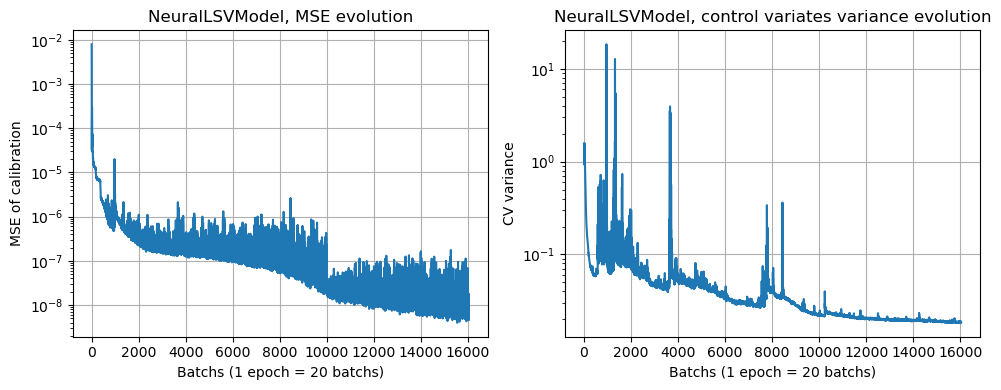

In [3]:
# Plot loss evolution during training

trainer = NeuralTrainer(model, problem)
trainer.plot_metrics(training_records=training_records, model_name=model_kind, N_batchs=20, fig_size=(10,4))

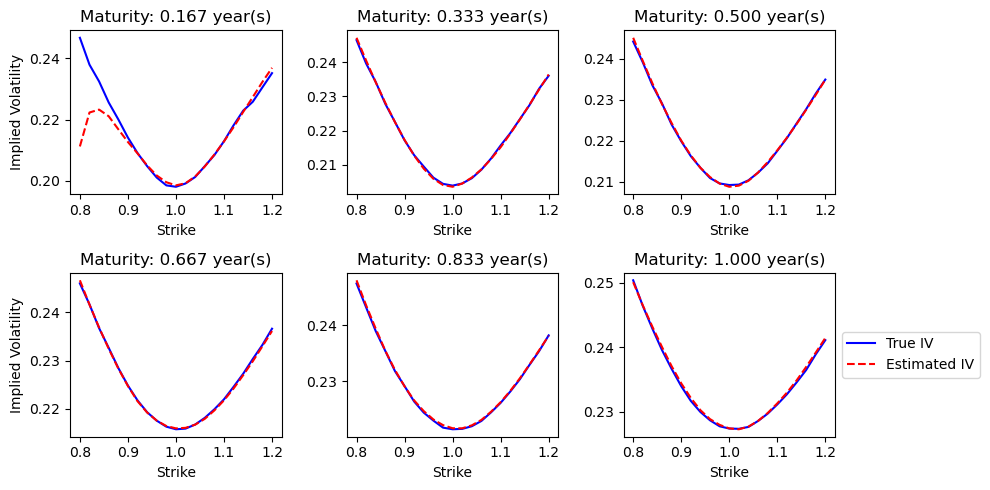

In [4]:
# Plot Implied Volatility

with torch.no_grad():
    vanilla_cv_price, vanilla_cv_price_variance, exotic_cv_price, exotic_cv_price_variance = model(s0=1., N_trn=20000)

true_data = model.data.clone().detach().cpu()
estimated_data = true_data.clone()
estimated_data[:, 2] = vanilla_cv_price.detach().cpu()

BSmodel = BlackScholesModel(r=model.rate, sigma=0.2) # sigma needs to be given, but it will not be used.
IV_surface = BSmodel.computeImpliedVolatilitySurface(x0=1, data=true_data)
estimated_IV_surface = BSmodel.computeImpliedVolatilitySurface(x0=1, data=estimated_data)

BSmodel.drawImpliedVolatilityCurves(IV_surface, estimated_IV_surface, fig_size=(10,5))#, plot_title="IV curves")

In [5]:
# Plot bounds over exotic price

folder = 'models/' # models/
model_kind = 'NeuralLSVModel' # or 'NeuralLSVModel'
extension = '.pt'
model_lowerbound = torch.load(folder + model_kind + '_lowerbound' + '_1e-08' + extension)
model_standard = torch.load(folder + model_kind + '_standard' + '_4e-09' + extension)
model_upperbound = torch.load(folder + model_kind + '_upperbound' + '_7e-07' + extension)

model_lowerbound.eval()
model_standard.eval()
model_upperbound.eval()

with torch.no_grad():
    price_lowerbound, _ = model_lowerbound(s0=1., N_trn=20000)
    price_standard, _ = model_standard(s0=1., N_trn=20000)
    price_upperbound, _ = model_upperbound(s0=1., N_trn=20000)

print(f"Lower bound for the exotic price: {price_lowerbound.item():.4f}")
print(f"Standard pricing for the exotic price: {price_standard.item():.4f}")
print(f"Upper bound for the exotic price: {price_upperbound.item():.4f}")

Lower bound for the exotic price: 0.1671
Standard pricing for the exotic price: 0.1723
Upper bound for the exotic price: 0.1896


In [6]:
# Plot bounds over exotic price

folder = 'models/' # models/
model_kind = 'NeuralLVModel' # or 'NeuralLSVModel'
extension = '.pt'
model_lowerbound = torch.load(folder + model_kind + '_lowerbound' + '_5e-08' + extension)
model_standard = torch.load(folder + model_kind + '_standard' + '_1e-08' + extension)
model_upperbound = torch.load(folder + model_kind + '_upperbound' + '_2e-07' + extension)

model_lowerbound.eval()
model_standard.eval()
model_upperbound.eval()

with torch.no_grad():
    price_lowerbound, _ = model_lowerbound(s0=1., N_trn=20000)
    price_standard, _ = model_standard(s0=1., N_trn=20000)
    price_upperbound, _ = model_upperbound(s0=1., N_trn=20000)

print(f"Lower bound for the exotic price: {price_lowerbound.item():.4f}")
print(f"Standard pricing for the exotic price: {price_standard.item():.4f}")
print(f"Upper bound for the exotic price: {price_upperbound.item():.4f}")

Lower bound for the exotic price: 0.1601
Standard pricing for the exotic price: 0.1813
Upper bound for the exotic price: 0.1852
